In [1]:
import importlib

import utils
from utils import fit_accuracy_from_task_loss, fit_task_loss_from_ladder_models, plot_actual_vs_predicted, plot_fit

/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-26 23:15:57,068	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [7]:
ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
RUNS = [
    "tootsie-scaling-soft-metrics-512-64dff5",
    "tootsie-scaling-soft-metrics-768-e6d0bb",
    "tootsie-scaling-soft-metrics-1024-ef3791",
    "tootsie-scaling-soft-metrics-1536-b928e4",
    "tootsie-scaling-soft-metrics-2048-c18a5c",
]

# the large run to predict the performance of
#PRED_RUN = "llama-70b-tootsie-dummy-testing-986d5d"
#PRED_RUN = "llama-22b-tootsie-dummy-testing-373d53"
PRED_RUN = "llama-13b-tootsie-dummy-testing-214059"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"

## Predict task loss from N, D

Pulling data for run: tootsie-scaling-soft-metrics-512-64dff5
History for run: tootsie-scaling-soft-metrics-512-64dff5
Step 0: {'eval/paloma/c4_en/bpb': np.float64(1.041199803352356), 'throughput/total_tokens': np.float64(41943040000.0), 'lm_eval/hellaswag_10shot/acc': np.float64(0.3103963353913563), 'run': 'tootsie-scaling-soft-metrics-512-64dff5', 'computed_params': 248791040, 'parameter_count': 248791552, 'step': 0}
Step 1: {'eval/paloma/c4_en/bpb': np.float64(1.0251566171646118), 'throughput/total_tokens': np.float64(83886080000.0), 'lm_eval/hellaswag_10shot/acc': np.float64(0.3189603664608644), 'run': 'tootsie-scaling-soft-metrics-512-64dff5', 'computed_params': 248791040, 'parameter_count': 248791552, 'step': 1}
Step 2: {'eval/paloma/c4_en/bpb': np.float64(1.0177671909332275), 'throughput/total_tokens': np.float64(125829120000.0), 'lm_eval/hellaswag_10shot/acc': np.float64(0.326229834694284), 'run': 'tootsie-scaling-soft-metrics-512-64dff5', 'computed_params': 248791040, 'paramet

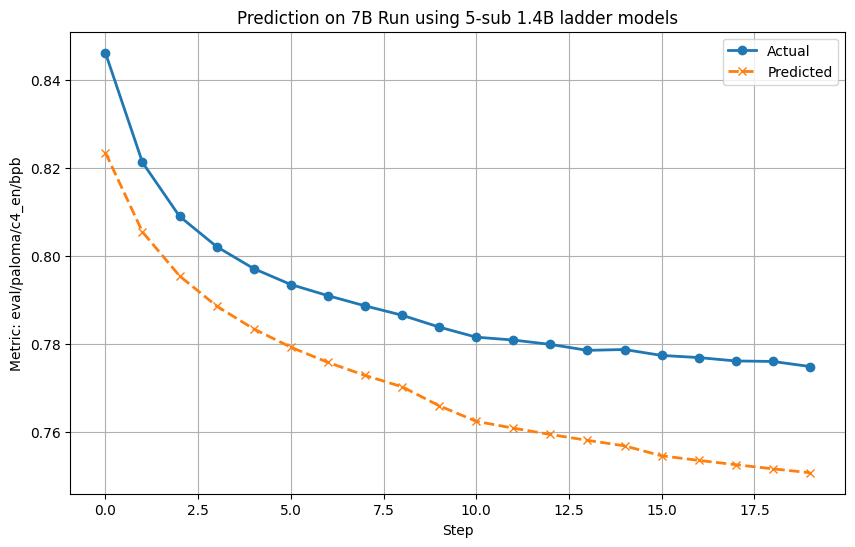

<module 'matplotlib.pyplot' from '/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [8]:
actual, predicted = fit_task_loss_from_ladder_models(
        runs=RUNS,
        entity=ENTITY,
        project=PROJECT,
        metrics=[TASK_LOSS, TOKENS_COL, TASK_ACCURACY],
        pred_run=PRED_RUN,
        task_loss=TASK_LOSS,
        aggregation=AGGREGATION,
        tokens_col=TOKENS_COL,
        param_col=PARAM_COL,
        param_col_to_use=PARAM_COL,
        use_log_for_ND=True,
        normalize_ND=True,
    )

plot_actual_vs_predicted(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

In [9]:
actual

array([0.84618473, 0.82123584, 0.80897808, 0.80209202, 0.79709601,
       0.79347974, 0.79094845, 0.78862935, 0.78649729, 0.78380233,
       0.78150481, 0.78085482, 0.77986062, 0.77850634, 0.77870029,
       0.77734816, 0.77686751, 0.77609384, 0.77598125, 0.77483147])

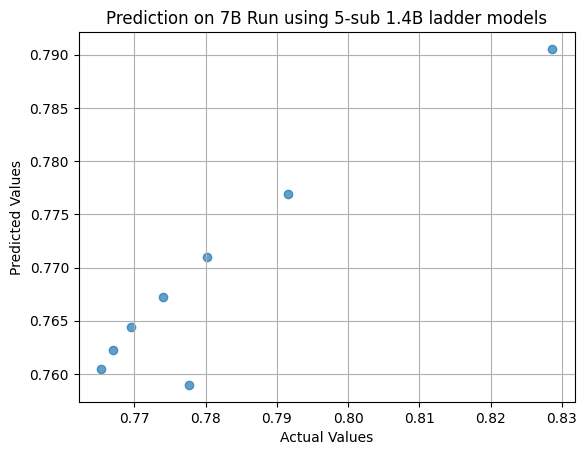

<module 'matplotlib.pyplot' from '/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [35]:
plot_fit(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

## Predict task accuracy from task loss

In [31]:
importlib.reload(utils)
from utils import fit_accuracy_from_task_loss


# get accuracy, which is hellaswag accuracy
actual_acc, pred_acc = fit_accuracy_from_task_loss(
    pred_task_losses=predicted,
    runs=RUNS,
    entity=ENTITY,
    project=PROJECT,
    x_axis="throughput/total_gflops",
    tokens_col=TOKENS_COL,
    pred_run=PRED_RUN,
    aggregation=AGGREGATION,
    task_loss_col=TASK_LOSS,
    accuracy_col=TASK_ACCURACY,
)

Pulling data for run: tootsie-scaling-soft-metrics-512-64dff5
History for run: tootsie-scaling-soft-metrics-512-64dff5
Step 0: {'eval/paloma/c4_en/bpb': np.float64(1.041199803352356), 'lm_eval/hellaswag_10shot/acc': np.float64(0.3103963353913563), 'throughput/total_tokens': np.float64(41943040000.0), 'run': 'tootsie-scaling-soft-metrics-512-64dff5', 'computed_params': 248791040, 'parameter_count': 248791552, 'step': 0}
Step 1: {'eval/paloma/c4_en/bpb': np.float64(1.0251566171646118), 'lm_eval/hellaswag_10shot/acc': np.float64(0.3189603664608644), 'throughput/total_tokens': np.float64(83886080000.0), 'run': 'tootsie-scaling-soft-metrics-512-64dff5', 'computed_params': 248791040, 'parameter_count': 248791552, 'step': 1}
Step 2: {'eval/paloma/c4_en/bpb': np.float64(1.0177671909332275), 'lm_eval/hellaswag_10shot/acc': np.float64(0.326229834694284), 'throughput/total_tokens': np.float64(125829120000.0), 'run': 'tootsie-scaling-soft-metrics-512-64dff5', 'computed_params': 248791040, 'paramet

KeyError: 'throughput/total_tokens'

In [ ]:
plot_actual_vs_predicted(
    actual_acc, pred_acc,
    title="Prediction on 7B Run using 5-sub 1.4B ladder models",
    task_metric=TASK_ACCURACY
)